In [18]:
import os
import tweepy
import requests
import pandas as pd
from dotenv import load_dotenv
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
load_dotenv()
consumer_key =  os.getenv("API_KEY")
consumer_secret = os.getenv("API_KEY_SECRET")
bearer_token = os.getenv("BEARER_TOKEN")
access_token = os.getenv('ACCESS_TOKEN')
access_token_secret = os.getenv('ACCESS_TOKEN_SECRET')

In [7]:
client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret, 
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

In [8]:
query = '#100daysofcode (pandas OR python) -is:retweet'

tweets= client.search_recent_tweets(query=query,tweet_fields=['author_id','created_at','lang'],max_results=100)

In [9]:
tweets

<Response [200]>

In [10]:
tweets_dict = tweets.json() 
list(tweets_dict)

['data', 'meta']

In [12]:
tweets_data = tweets_dict['data'] 

In [13]:
list(tweets_data[0])

['created_at', 'text', 'author_id', 'id', 'lang']

In [14]:
df = pd.json_normalize(tweets_data)
df

,created_at,text,author_id,id,lang
0,2022-06-28T13:23:00.000Z,For all your plumbing needs\nhttps://t.co/IMB5...,1533742158943256577,1541774165950500864,en
1,2022-06-28T13:22:50.000Z,For all your plumbing needs\nhttps://t.co/nj7h...,1449230846418771973,1541774123147218944,en
2,2022-06-28T13:22:22.000Z,Most useful Linux Networking Commands ▶️\n#Ana...,1155470031225884675,1541774007166328833,en
3,2022-06-28T13:21:32.000Z,100%OFF #UdemyCoupon Code For Today 28/06/2022...,1465789687046578180,1541773796666970114,en
4,2022-06-28T13:21:28.000Z,For all your plumbing needs\nhttps://t.co/lfb2...,1488487086118215683,1541773778983653376,en
...,...,...,...,...,...
95,2022-06-28T12:46:16.000Z,Best business Telecom company in Arizona\nhttp...,1511932634393640964,1541764920353894400,en
96,2022-06-28T12:45:16.000Z,javascript \npython \nhtml\ncss\nProgramming l...,363533675,1541764671346196480,en
97,2022-06-28T12:44:50.000Z,#neuralnetworks #cloudcomputing #appdevelopmen...,1528856711725031425,1541764559995904002,en
98,2022-06-28T12:44:17.000Z,Free sign-up - Win unto $200 Fantasy Sport- An...,1511932634393640964,1541764421185576961,en


In [15]:
# guardo en un .csv
df.to_csv("codigo-tweets.csv")

In [24]:
#define your function here

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False


In [26]:
# Initialize list to store tweet counts
[pandas, python] = [0, 0]

# Iterate through df, counting the number of tweets in which each(pandas and python) is mentioned.
for index, row in df.iterrows():
    print(row)
    pandas += word_in_text('pandas', row['text'])
    python += word_in_text('python', row['text'])

created_at                             2022-06-28T13:23:00.000Z
text          For all your plumbing needs\nhttps://t.co/IMB5...
author_id                                   1533742158943256577
id                                          1541774165950500864
lang                                                         en
Name: 0, dtype: object
created_at                             2022-06-28T13:22:50.000Z
text          For all your plumbing needs\nhttps://t.co/nj7h...
author_id                                   1449230846418771973
id                                          1541774123147218944
lang                                                         en
Name: 1, dtype: object
created_at                             2022-06-28T13:22:22.000Z
text          Most useful Linux Networking Commands ▶️\n#Ana...
author_id                                   1155470031225884675
id                                          1541774007166328833
lang                                                      

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


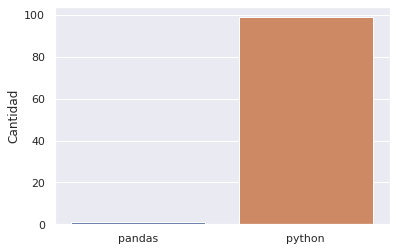

In [34]:
# Create a list of labels:cd
cd = ['pandas', 'python']

# Plot the bar chart
ax = sns.barplot(cd, [pandas, python])
ax.set(ylabel="Cantidad")
plt.show()